In [5]:
from values import *
from sympy import *
from func import *
import pickle
import numpy as np
from matplotlib import pyplot as plt

n_fur = 5
n = 2

In [4]:
in_file = open("fou_sub_f","rb")
fou_sub_f = pickle.load(in_file)
in_file.close()
in_file = open("fou_sub_df","rb")
fou_sub_df = pickle.load(in_file)
in_file.close()
in_file = open("fou_sub_d2f","rb")
fou_sub_d2f = pickle.load(in_file)
in_file.close()

In [6]:
e = symbols('e', real=True)
f = symbols('f', real=True)
df = symbols('df', real=True)
d2f = symbols('d2f', real=True)
sigmass0 = symbols('sigma_ss0')
sigmas0 = symbols("sigma_s0")
Ms = symbols("M_s")
w1 = symbols('w1')  # temporary symbol for substitution
x = symbols('x', real=True)
ka = symbols('kappa', real=True)
T = symbols('T', real=True)
mu = symbols('mu', real=True)
qs0 = symbols('q_s0', real=True)
t = symbols('t', real=True)
z = symbols('z')
nu = symbols("nu")
lam = symbols("lambda")

dusi = IndexedBase("dus_i")
dusij = IndexedBase("du_s")
d2usi = IndexedBase("dus_i")
phip1i1 = IndexedBase('Phip1_i_1')
phip1ij1 = IndexedBase('Phi_p1_1')
dphip1i1 = IndexedBase('dPhip1_i_1')
Upsilonp1i1 = IndexedBase('Upsilonp1_i_1')
Upsilonp1ij1 = IndexedBase('Upsilon_p1_1')
A = IndexedBase('A', real=True)
B = IndexedBase('B', real=True)
b = symbols('b', real=True)
i, j = symbols('i j', cls=Idx)

#subf = {f: sub_f, df: sub_df, d2f: sub_d2f}
subf = {f: fou_sub_f, df: fou_sub_df, d2f: fou_sub_d2f}

**1**

In [8]:
dus = Sum((e ** i / factorial(i)) * dusi[i], (i, 0, n)).doit()

for k in range(n + 1):
    dus = dus.subs(dusi[k], Sum(((I * e * f) ** j / factorial(j)) * dusij[k, j], (j, 0, n)).doit())

dus = ser(dus, n + 1)
dus

e**2*(-f**2*du_s[0, 2]/2 + I*f*du_s[1, 1] + du_s[2, 0]/2) + e*(I*f*du_s[0, 1] + du_s[1, 0]) + du_s[0, 0]

In [10]:
d2us = Sum((e ** i / factorial(i)) * d2usi[i], (i, 0, n)).doit()

for k in range(n + 1):
    d2us = d2us.subs(d2usi[k], Sum(((I * e * f) ** j / factorial(j)) * dusij[k, j + 1], (j, 0, n)).doit())

d2us = ser(d2us, n + 1)
d2us

e**2*(-f**2*du_s[0, 3]/2 + I*f*du_s[1, 2] + du_s[2, 1]/2) + e*(I*f*du_s[0, 2] + du_s[1, 1]) + du_s[0, 1]

In [12]:
expoa = (1 + I * e * df) / sqrt(1 + e ** 2 * df ** 2)
expoa = expoa.series(e, n=n + 1)
expoa = expoa.removeO()

In [13]:
h = (1 + e ** 2 * df ** 2)  #
hm = series((I + e * df) / h, e, n=n + 1)
hm = hm.removeO()

In [14]:
cr = e * d2f / h ** 3
cr = cr.series(e, n=n + 1)
cr = cr.removeO()

In [15]:
rhs1 = (sigmass0 * cr + Ms * cr * re(dus) + sigmas0 * im(d2us * expoa)) - I * (
            Ms * re(d2us * expoa) - sigmas0 * cr * im(dus))
rhs1 = ser(rhs1, n + 1)
rhs1

-I*M_s*re(du_s[0, 1]) + e**2*(-M_s*d2f*f*im(du_s[0, 1]) + M_s*d2f*re(du_s[1, 0]) + I*M_s*df**2*re(du_s[0, 1])/2 + I*M_s*df*f*re(du_s[0, 2]) + I*M_s*df*im(du_s[1, 1]) + I*M_s*f**2*re(du_s[0, 3])/2 + I*M_s*f*im(du_s[1, 2]) - I*M_s*re(du_s[2, 1])/2 + I*d2f*f*sigma_s0*re(du_s[0, 1]) + I*d2f*sigma_s0*im(du_s[1, 0]) - df**2*sigma_s0*im(du_s[0, 1])/2 - df*f*sigma_s0*im(du_s[0, 2]) + df*sigma_s0*re(du_s[1, 1]) - f**2*sigma_s0*im(du_s[0, 3])/2 + f*sigma_s0*re(du_s[1, 2]) + sigma_s0*im(du_s[2, 1])/2) + e*(M_s*d2f*re(du_s[0, 0]) + I*M_s*df*im(du_s[0, 1]) + I*M_s*f*im(du_s[0, 2]) - I*M_s*re(du_s[1, 1]) + I*d2f*sigma_s0*im(du_s[0, 0]) + d2f*sigma_ss0 + df*sigma_s0*re(du_s[0, 1]) + f*sigma_s0*re(du_s[0, 2]) + sigma_s0*im(du_s[1, 1])) + sigma_s0*im(du_s[0, 1])

**2**

In [18]:
i, j = symbols('i j', cls=Idx)
phip11 = Sum(e ** i / factorial(i) * phip1i1[i], (i, 0, n)).doit()

for i in range(n + 1):
    phip11 = phip11.subs(phip1i1[i], Sum((I * e * f) ** j / factorial(j) * phip1ij1[i, j], (j, 0, n)).doit())

phip11 = ser(phip11, n + 1)

In [19]:
i, j = symbols('i j', cls=Idx)
dphip11 = Sum(e ** i / factorial(i) * dphip1i1[i], (i, 0, n)).doit()

for i in range(n + 1):
    dphip11 = dphip11.subs(dphip1i1[i], Sum((I * e * f) ** j / factorial(j) * phip1ij1[i, j + 1], (j, 0, n)).doit())

dphip11 = ser(dphip11, n + 1)

In [20]:
i, j = symbols('i j', cls=Idx)
Upsilonp11 = Sum(e ** i / factorial(i) * Upsilonp1i1[i], (i, 0, n)).doit()

for i in range(n + 1):
    Upsilonp11 = Upsilonp11.subs(Upsilonp1i1[i],
                                     Sum((-I * e * f) ** j / factorial(j) * Upsilonp1ij1[i, j], (j, 0, n)).doit())

Upsilonp11 = ser(Upsilonp11, n + 1)

In [21]:
expoa = 1 - 2 * I * e * df / (1 + I * e * df)
expoa = expoa.series(e, n=n + 1)
expoa = expoa.removeO()

In [22]:
eqq1 = phip11 + conjugate(phip11) - (
            Upsilonp11 + conjugate(phip11) - (w1 - conjugate(w1)) * conjugate(dphip11)) * expoa - rhs1
eqq1 = eqq1.subs(w1, x + I * e * f)

eqq1 = ser(eqq1, n + 1)
eqq1

I*M_s*re(du_s[0, 1]) + e**2*(M_s*d2f*f*im(du_s[0, 1]) - M_s*d2f*re(du_s[1, 0]) - I*M_s*df**2*re(du_s[0, 1])/2 - I*M_s*df*f*re(du_s[0, 2]) - I*M_s*df*im(du_s[1, 1]) - I*M_s*f**2*re(du_s[0, 3])/2 - I*M_s*f*im(du_s[1, 2]) + I*M_s*re(du_s[2, 1])/2 - I*d2f*f*sigma_s0*re(du_s[0, 1]) - I*d2f*sigma_s0*im(du_s[1, 0]) + df**2*sigma_s0*im(du_s[0, 1])/2 + 2*df**2*conjugate(Phi_p1_1[0, 0]) + 2*df**2*Upsilon_p1_1[0, 0] + df*f*sigma_s0*im(du_s[0, 2]) + 6*df*f*conjugate(Phi_p1_1[0, 1]) + 2*df*f*Upsilon_p1_1[0, 1] - df*sigma_s0*re(du_s[1, 1]) + 2*I*df*conjugate(Phi_p1_1[1, 0]) + 2*I*df*Upsilon_p1_1[1, 0] + f**2*sigma_s0*im(du_s[0, 3])/2 + 2*f**2*conjugate(Phi_p1_1[0, 2]) - f**2*Phi_p1_1[0, 2]/2 + f**2*Upsilon_p1_1[0, 2]/2 - f*sigma_s0*re(du_s[1, 2]) + 2*I*f*conjugate(Phi_p1_1[1, 1]) + I*f*Phi_p1_1[1, 1] + I*f*Upsilon_p1_1[1, 1] - sigma_s0*im(du_s[2, 1])/2 + Phi_p1_1[2, 0]/2 - Upsilon_p1_1[2, 0]/2) + e*(-M_s*d2f*re(du_s[0, 0]) - I*M_s*df*im(du_s[0, 1]) - I*M_s*f*im(du_s[0, 2]) + I*M_s*re(du_s[1, 1]) - I

**3**

In [23]:
subp = {dusij[0, 0]: ((ka + 1) * T / 4 - qs0) / (2 * mu), phip1ij1[0, 0]: T / 4, Upsilonp1ij1[0, 0]: T / 4}

for l in range(1, n + 2):
    subp[dusij[0, l]] = 0
    subp[phip1ij1[0, l]] = 0
    subp[Upsilonp1ij1[0, l]] = 0

In [24]:
 for k in range(1, n + 1):
        #sub_dus = (A[k, 1] + I * A[k, (-1)]) * cos(k * b * x) + (B[k, 1] + I * B[k, (-1)]) * sin(k * b * x) # for non-fourier series
    sub_dus = 0
    for k_f in range (1,n_fur+1):
        sub_dus += (A[k, k_f] + I * A[k, (-k_f)]) * cos(k_f * b * x) + (B[k, k_f] + I * B[k, (-k_f)]) * sin(k_f * b * x)


    subp[dusij[k, 0]] = sub_dus
    subp_dusd = sub_dus
    for l in range(1, n + 1):
        subp_dusd = subp_dusd.diff(x)
        subp[dusij[k, l]] = subp_dusd
    subp[phip1ij1[k, 0]] = 0
    subp[Upsilonp1ij1[k, 0]] = 0
    for l in range(1, n + 1):
        subp[phip1ij1[k, l]] = 0
        subp[Upsilonp1ij1[k, l]] = 0

In [25]:
eqq1l = []
for l in range(n + 1):
    eqq1l.append(eqq1.coeff(e, l))

reqq1i = []

In [26]:
for i in range(n):
    reqq1i.append(eqq1l[i+1].subs(subp))
    reqq1i[i] = reqq1i[i].subs(subf)
    reqq1i[i] = reqq1i[i].rewrite(exp(I * b * x))
    reqq1i[i] = reqq1i[i].expand()

    for j in range(n_fur,0,-1):
        reqq1i[i] = reqq1i[i].subs(exp(-j * I * b * x), 1 / (t ** j))
        reqq1i[i] = reqq1i[i].subs(exp(j * I * b * x), t ** j)

    reqq1i[i] = collect(reqq1i[i], t)

In [27]:
subupsilon = [0]
for k in range(1,n+1):
    subupsilon.append(0)
    for k_f in range(1,n_fur+1):

        subupsilon[k] += (reqq1i[k-1].coeff(t,k_f)*exp(k_f * I * b * z))

In [28]:
for i in range(1, n + 1):
    Upsilonp11 = Upsilonp11.subs(Upsilonp1ij1[i, 0], subupsilon[i])
    subupsilondiff = subupsilon[i]
    for j in range(1,n + 1):
        subupsilondiff = diff(subupsilondiff, z)
        Upsilonp11 = Upsilonp11.subs(Upsilonp1ij1[i, j], subupsilondiff)
Upsilonp11 = Upsilonp11.subs(subp)

In [29]:
subphii = [0]
for k in range(1,n+1):
    subphii.append(0)
    for k_f in range(1,n_fur+1):

        subphii[k] += (-1*(reqq1i[k-1].coeff(t,-k_f)*exp(-k_f*I*b*z)))

In [30]:
for i in range(1, n + 1):
    phip11 = phip11.subs(phip1ij1[i, 0], subphii[i])
    subphidiff = subphii[i]
    for j in range(1, n + 1):
        subphidiff = diff(subphidiff, z)
        phip11 = phip11.subs(phip1ij1[i, j], subphidiff)
phip11 = phip11.subs(subp)  

In [31]:
for i in range(1, n + 1):
    dphip11 = dphip11.subs(phip1ij1[i, 0], subphii[i])
    subphidiff = subphii[i]
    for j in range(1, n + 1):  # n or n+1
        subphidiff = diff(subphidiff, z)
        dphip11 = dphip11.subs(phip1ij1[i, j], subphidiff)
dphip11 = dphip11.subs(subp)

**4**

In [33]:
Upsilonp11 = Upsilonp11.subs(z, x)  # substitutions and series
Upsilonp11 = Upsilonp11.subs(qs0, 0)

phip11 = phip11.subs(z, x)
phip11 = phip11.subs(qs0, 0)

dphip11 = dphip11.subs(z, x)
dphip11 = dphip11.subs(qs0, 0)

In [34]:
i, j = symbols('i j', cls=Idx)
dus = Sum((e ** i / factorial(i)) * dusi[i], (i, 0, n)).doit()
for k in range(n + 1):
    dus = dus.subs(dusi[k], Sum(((I * e * f) ** j / factorial(j)) * dusij[k, j], (j, 0, n)).doit())
dus = ser(dus, n + 1)

d2us = Sum((e ** i / factorial(i)) * d2usi[i], (i, 0, n)).doit()
for k in range(n + 1):
    d2us = d2us.subs(d2usi[k], Sum(((I * e * f) ** j / factorial(j)) * dusij[k, j + 1], (j, 0, n)).doit())
d2us = ser(d2us, n + 1)

expoa = 1 - 2 * I * e * df / (1 + I * e * df)
expoa = expoa.series(e, n=n + 1)
expoa = expoa.removeO()
h = (1 + e ** 2 * df ** 2)
hm = series((I + e * df) / h, e, n=n + 1)
hm = hm.removeO()
cr = e * d2f / h ** 3
cr = cr.series(e, n=n + 1)
cr = cr.removeO()

In [35]:
qs = (sigmass0 * cr + Ms * cr * re(dus) + sigmas0 * im(d2us * expoa)) - I * (
                Ms * re(d2us * expoa) - sigmas0 * cr * im(dus))

qs = ser(qs, n + 1)

eqq4 = 2 * mu * dus - (ka + 1) * phip11 + qs
eqq4 = eqq4.expand()
eqq4 = collect(eqq4, e)
eqq4

-I*M_s*re(du_s[0, 1]) - T*kappa/4 - T/4 + e**2*(-0.0395075349267849*M_s*T*a*b**3*f*kappa**2*exp(-I*b*x)/mu - 0.116272078967415*M_s*T*a*b**3*f*kappa**2*exp(-2*I*b*x)/mu - 0.144362612591014*M_s*T*a*b**3*f*kappa**2*exp(-3*I*b*x)/mu - 0.125885717916519*M_s*T*a*b**3*f*kappa**2*exp(-4*I*b*x)/mu - 0.0904507178878806*M_s*T*a*b**3*f*kappa**2*exp(-5*I*b*x)/mu - 0.0790150698535697*M_s*T*a*b**3*f*kappa*exp(-I*b*x)/mu - 0.23254415793483*M_s*T*a*b**3*f*kappa*exp(-2*I*b*x)/mu - 0.288725225182027*M_s*T*a*b**3*f*kappa*exp(-3*I*b*x)/mu - 0.251771435833038*M_s*T*a*b**3*f*kappa*exp(-4*I*b*x)/mu - 0.180901435775761*M_s*T*a*b**3*f*kappa*exp(-5*I*b*x)/mu - 0.0395075349267849*M_s*T*a*b**3*f*exp(-I*b*x)/mu - 0.116272078967415*M_s*T*a*b**3*f*exp(-2*I*b*x)/mu - 0.144362612591014*M_s*T*a*b**3*f*exp(-3*I*b*x)/mu - 0.125885717916519*M_s*T*a*b**3*f*exp(-4*I*b*x)/mu - 0.0904507178878806*M_s*T*a*b**3*f*exp(-5*I*b*x)/mu + 0.0290680197418537*I*M_s*a*b**2*kappa*exp(-I*b*x)*A[1, -1] - 0.136643085989952*I*M_s*a*b**2*kappa*

In [36]:
subsi = {dusij[0, 0]: ((ka + 1) * T / 4) / (2 * mu)}

for k in range(1, n + 2):
    subsi[dusij[0, k]] = 0

for k in range(1, n + 1):
    #sub_dus = (A[k, 1] + I * A[k, (-1)]) * cos(k * b * x) + (B[k, 1] + I * B[k, (-1)]) * sin(k * b * x) # origin for non-fourier
    sub_dus = 0
    for k_f in range(1,n_fur+1):
        sub_dus += (A[k, k_f] + I * A[k, (-k_f)]) * cos(k_f * b * x) + (B[k, k_f] + I * B[k, (-k_f)]) * sin(k_f * b * x)
    subsi[dusij[k, 0]] = sub_dus
    sub_dus_d = diff(sub_dus, x)
    for l in range(1, n + 1):
        subsi[dusij[k, l]] = sub_dus_d
        sub_dus_d = diff(sub_dus_d, x)

In [37]:
eqq4l = [0]
    #coslist = []


for k in range(1, n + 1):

    eqq4l.append(eqq4.coeff(e, k))
    eqq4l[k] = eqq4l[k].subs(subf)
    eqq4l[k] = eqq4l[k].subs(subsi)
    eqq4l[k] = eqq4l[k].expand()
    eqq4l[k] = eqq4l[k].rewrite(exp(I * b * x))

    trig_sub = {}
    for k_f in range(n_fur,0,-1):
        trig_sub[exp(-k_f * I * b * x)] = 1 / (t ** k_f)
        trig_sub[exp(k_f * I * b * x)] = t ** k_f
    eqq4l[k] = eqq4l[k].subs(trig_sub)
    eqq4l[k] = eqq4l[k].expand()
    eqq4l[k] = eqq4l[k].evalf()
    eqq4l[k] = eqq4l[k].collect(t)

In [40]:
eqslist = []

for k in range(1,n+1):
    cfc = [0]
    cfs = [0]
    for k_f in range(1,n_fur+1):
        cfc.append(eqq4l[k].coeff(t,k_f))
        cfs.append(eqq4l[k].coeff(t, -k_f))


    for k_f in range(1,n_fur+1):
        eqslist.append([re(cfc[k_f]),im(cfc[k_f]),re(cfs[k_f]),im(cfs[k_f])])

eqslist[0][0]

0.0395075349267849*T*a*b**2*kappa*re(M_s)/mu + 0.0395075349267849*T*a*b**2*re(M_s)/mu + 0.316060279414279*a*b**2*re(sigma_ss0) + 0.5*b*re(M_s)*A[1, 1] + 0.5*b*re(sigma_s0)*B[1, -1] + 0.5*b*im(M_s)*B[1, 1] - 0.5*b*im(sigma_s0)*A[1, -1] + mu*A[1, 1] + mu*B[1, -1]

**5**

In [41]:
unkn = [] 

for k in range(1, n + 1):
    #unkn.append([A[k, 1], A[k, (-1)], B[k, 1], B[k, (-1)]]) # origin for non-fourier

    for k_f in range(1,n_fur+1):

        unkn.append(A[k, k_f])
        unkn.append(A[k, (-k_f)])
        unkn.append(B[k, k_f])
        unkn.append(B[k, (-k_f)])
par0 = {qs0: 0}


par1 = {b: 2 * pi / a, ka: 3 - 4 * (lam / (2 * (lam + mu))), x: x * a, nu: lam / (2 * (lam + mu))}


par2 = {lam: 58.17 * 10 ** 9, mu: 26.13 * 10 ** 9, Ms: 6.099, a: 10 * 10 ** (-9), T: 0.1 * 10 ** 9, sigmass0: 1,
        sigmas0: 1}  

In [44]:
subf = {f: fou_sub_f, df: fou_sub_df, d2f: fou_sub_d2f}
subc = {}  # coeffs


for kn in range(1,n+1):
    eqss = []
    for k in range(1,n_fur+1):
        for kir in range(4):
            cure = eqslist[(k - 1)+(kn-1)*n_fur][kir]
            cure = cure.subs(par0)
            cure = cure.subs(par1)
            cure = cure.subs(subc)
            cure = cure.evalf(subs=par2)
            eqss.append(cure)

    sol0 = solve(eqss, unkn)

    subc = subc | sol0
subc

{A[1, -1]: 0.0,
 A[1, -2]: 0.0,
 A[1, -3]: 0.0,
 A[1, -4]: 0.0,
 A[1, -5]: 0.0,
 A[1, 1]: 0.0224479792593249,
 A[1, 2]: 0.0239546563530375,
 A[1, 3]: 0.0165797212278711,
 A[1, 4]: 0.00949528904249694,
 A[1, 5]: 0.00488842605334299,
 B[1, -1]: -0.0713530374969903,
 B[1, -2]: -0.0959650092445482,
 B[1, -3]: -0.0760897137912353,
 B[1, -4]: -0.0482876926674006,
 B[1, -5]: -0.0270848013146023,
 B[1, 1]: 0.0,
 B[1, 2]: 0.0,
 B[1, 3]: 0.0,
 B[1, 4]: 0.0,
 B[1, 5]: 0.0,
 A[2, -1]: 0.0,
 A[2, -2]: 0.0,
 A[2, -3]: 0.0,
 A[2, -4]: 0.0,
 A[2, -5]: 0.0,
 A[2, 1]: 0.0436076656542080,
 A[2, 2]: 0.175115600415880,
 A[2, 3]: 0.304578462533510,
 A[2, 4]: 0.367421314500173,
 A[2, 5]: 0.303262591171507,
 B[2, -1]: 0.982040758725975,
 B[2, -2]: 1.31719443327515,
 B[2, -3]: 1.37058458324597,
 B[2, -4]: 1.11602402415418,
 B[2, -5]: 0.558011420771927,
 B[2, 1]: 0.0,
 B[2, 2]: 0.0,
 B[2, 3]: 0.0,
 B[2, 4]: 0.0,
 B[2, 5]: 0.0}

In [45]:
Upsilonp11 = Upsilonp11.subs(z, x)
Upsilonp11 = Upsilonp11.subs(subc)
Upsilonp11 = Upsilonp11.subs(subf)
Upsilonp11 = Upsilonp11.subs(par0)
Upsilonp11 = Upsilonp11.subs(par1)
Upsilonp11 = Upsilonp11.subs(par2)
Upsilonp11 = Upsilonp11.evalf()
Upsilonp11

e**2*(-1.0e-8*I*(-1.76496274249961e+18*I*exp(10*I*pi*x) - 2.44817364295483e+18*I*exp(8*I*pi*x) - 2.77911973834503e+18*I*exp(6*I*pi*x) - 2.18091714111882e+18*I*exp(4*I*pi*x) - 6.78145849825809e+17*I*exp(2*I*pi*x))*(-0.632120558828558*cos(2*pi*x) - 0.23254415793483*cos(4*pi*x) - 0.0855482148687488*cos(6*pi*x) - 0.0314714294791298*cos(8*pi*x) - 0.0115776918896487*cos(10*pi*x)) + 1625793368.27833*exp(10*I*pi*x) + 1898975789.22071*exp(8*I*pi*x) + 1495730829.73245*exp(6*I*pi*x) + 979732815.915335*exp(4*I*pi*x) + 768925425.716492*exp(2*I*pi*x)) + e*(-561805089.683681*exp(10*I*pi*x) - 974097342.058884*exp(8*I*pi*x) - 1474368812.67289*exp(6*I*pi*x) - 1735518717.41453*exp(4*I*pi*x) - 1079302641.37032*exp(2*I*pi*x)) + 25000000.0

In [46]:
phip11 = phip11.subs(z, x)
phip11 = phip11.subs(subc)
phip11 = phip11.subs(subf)
phip11 = phip11.subs(par0)
phip11 = phip11.subs(par1)
phip11 = phip11.subs(par2)
phip11 = phip11.evalf()
phip11

e**2*(1.0e-8*I*(-8.73647053236152e+17*I*exp(-2*I*pi*x) - 2.31742515372602e+18*I*exp(-4*I*pi*x) - 2.72379328475956e+18*I*exp(-6*I*pi*x) - 2.28116200765839e+18*I*exp(-8*I*pi*x) - 1.58497255728754e+18*I*exp(-10*I*pi*x))*(-0.632120558828558*cos(2*pi*x) - 0.23254415793483*cos(4*pi*x) - 0.0855482148687488*cos(6*pi*x) - 0.0314714294791298*cos(8*pi*x) - 0.0115776918896487*cos(10*pi*x)) + 609505515.440592*exp(-2*I*pi*x) + 1856368021.39256*exp(-4*I*pi*x) + 3091124734.80406*exp(-6*I*pi*x) + 3656300262.26182*exp(-8*I*pi*x) + 2964033638.06485*exp(-10*I*pi*x)) + e*(1390452470.40202*exp(-2*I*pi*x) + 1844148342.30496*exp(-4*I*pi*x) + 1445017217.43331*exp(-6*I*pi*x) + 907645523.78066*exp(-8*I*pi*x) + 504512434.314629*exp(-10*I*pi*x)) + 25000000.0

In [47]:
dphip11 = dphip11.subs(z, x)
dphip11 = dphip11.subs(subc)
dphip11 = dphip11.subs(subf)
dphip11 = dphip11.subs(par0)
dphip11 = dphip11.subs(par1)
dphip11 = dphip11.subs(par2)
dphip11 = dphip11.evalf()
dphip11

e**2*(1.0e-8*I*(-5.48928632855413e+26*exp(-2*I*pi*x) - 2.91216233527595e+27*exp(-4*I*pi*x) - 5.1342293839787e+27*exp(-6*I*pi*x) - 5.73318544392618e+27*exp(-8*I*pi*x) - 4.97933814211597e+27*exp(-10*I*pi*x))*(-0.632120558828558*cos(2*pi*x) - 0.23254415793483*cos(4*pi*x) - 0.0855482148687488*cos(6*pi*x) - 0.0314714294791298*cos(8*pi*x) - 0.0115776918896487*cos(10*pi*x)) - 3.82963609926125e+17*I*exp(-2*I*pi*x) - 2.33278085534635e+18*I*exp(-4*I*pi*x) - 5.82663285491407e+18*I*exp(-6*I*pi*x) - 9.18928483459213e+18*I*exp(-8*I*pi*x) - 9.31178630233756e+18*I*exp(-10*I*pi*x)) + e*(-8.73647053236152e+17*I*exp(-2*I*pi*x) - 2.31742515372602e+18*I*exp(-4*I*pi*x) - 2.72379328475956e+18*I*exp(-6*I*pi*x) - 2.28116200765839e+18*I*exp(-8*I*pi*x) - 1.58497255728754e+18*I*exp(-10*I*pi*x))

In [48]:
expoa = 1 - 2 * I * e * df / (1 + I * e * df)  # get series
expoa = expoa.series(e, n=n + 1)
expoa = expoa.removeO()
h = (1 + e ** 2 * df ** 2)
hm = series(1 / h, e, n=n + 1)
hm = hm.removeO()
cr = e * d2f / h ** 3
cr = cr.series(e, n=n + 1)
cr = cr.removeO()

In [49]:
G1 = phip11 + conjugate(phip11) - (
                Upsilonp11 + conjugate(phip11) - (w1 - conjugate(w1)) * conjugate(dphip11)) * expoa

G1 = G1.subs(w1, x + I * e * f)
G1 = ser(G1, n + 1)
G1

e**2*(100000000.0*df**2 - 114585310.738104*I*df*exp(10*I*pi*x) - 132903636.556447*I*df*exp(8*I*pi*x) - 58703190.4791527*I*df*exp(6*I*pi*x) + 217259249.780866*I*df*exp(4*I*pi*x) + 622299658.063405*I*df*exp(2*I*pi*x) - 3.16994511457508e+18*f*exp(10*I*pi*x) - 4.56232401531677e+18*f*exp(8*I*pi*x) - 5.44758656951911e+18*f*exp(6*I*pi*x) - 4.63485030745204e+18*f*exp(4*I*pi*x) - 1.7472941064723e+18*f*exp(2*I*pi*x) - 11156692351.0044*exp(10*I*pi*x)*cos(2*pi*x) - 4104317747.40919*exp(10*I*pi*x)*cos(4*pi*x) - 1509894119.30693*exp(10*I*pi*x)*cos(6*pi*x) - 555459004.838679*exp(10*I*pi*x)*cos(8*pi*x) - 204341948.293699*exp(10*I*pi*x)*cos(10*pi*x) - 1625793368.27833*exp(10*I*pi*x) - 15475408912.9395*exp(8*I*pi*x)*cos(2*pi*x) - 5693084782.79175*exp(8*I*pi*x)*cos(4*pi*x) - 2094368848.43507*exp(8*I*pi*x)*cos(6*pi*x) - 770475241.56917*exp(8*I*pi*x)*cos(8*pi*x) - 283442001.304899*exp(8*I*pi*x)*cos(10*pi*x) - 1898975789.22071*exp(8*I*pi*x) - 17567387220.5414*exp(6*I*pi*x)*cos(2*pi*x) - 6462680593.5351*exp(

In [58]:
sigma_1nn = re(G1).evalf()
sigma_1tt_plus_sigma_1nn = re(4 * phip11).evalf()
sigma_1tt = sigma_1tt_plus_sigma_1nn - sigma_1nn
sigmatt = sigma_1tt
sigmann = sigma_1nn
sigmatt = sigmatt.subs(e, 0.1)
sigmatt = sigmatt.subs(f, fou_sub_f)
sigmatt = sigmatt.subs(df,fou_sub_df)
sigmatt = sigmatt.subs(b, par1[b])
sigmatt = sigmatt.subs(a, par2[a])
sigmatt

-1.0e-10*(126424111.765712*pi*sin(200000000*pi*x) + 93017663.1739319*pi*sin(400000000*pi*x) + 51328928.9212492*pi*sin(600000000*pi*x) + 25177143.5833038*pi*sin(800000000*pi*x) + 11577691.8896487*pi*sin(1000000000*pi*x))**2 + 0.0622299658063405*(126424111.765712*pi*sin(200000000*pi*x) + 93017663.1739319*pi*sin(400000000*pi*x) + 51328928.9212492*pi*sin(600000000*pi*x) + 25177143.5833038*pi*sin(800000000*pi*x) + 11577691.8896487*pi*sin(1000000000*pi*x))*sin(2*pi*x) + 0.0217259249780866*(126424111.765712*pi*sin(200000000*pi*x) + 93017663.1739319*pi*sin(400000000*pi*x) + 51328928.9212492*pi*sin(600000000*pi*x) + 25177143.5833038*pi*sin(800000000*pi*x) + 11577691.8896487*pi*sin(1000000000*pi*x))*sin(4*pi*x) - 0.00587031904791527*(126424111.765712*pi*sin(200000000*pi*x) + 93017663.1739319*pi*sin(400000000*pi*x) + 51328928.9212492*pi*sin(600000000*pi*x) + 25177143.5833038*pi*sin(800000000*pi*x) + 11577691.8896487*pi*sin(1000000000*pi*x))*sin(6*pi*x) - 0.0132903636556447*(126424111.765712*pi*si

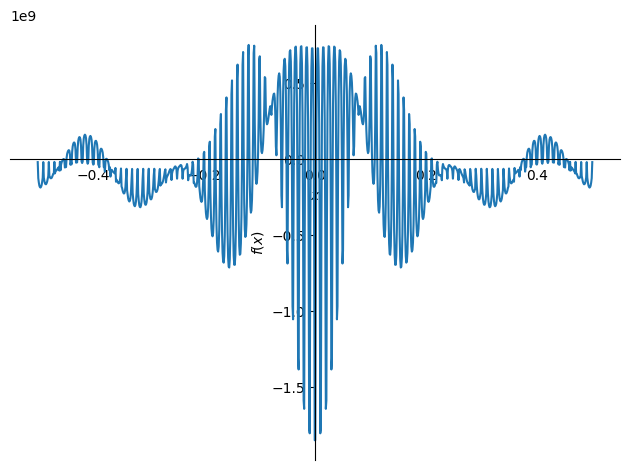

In [51]:
plot(sigmatt, (x, -0.5, 0.5))

In [59]:
sigma_1nn = re(G1).evalf()
sigma_1tt_plus_sigma_1nn = re(4 * phip11).evalf()
sigma_1tt = sigma_1tt_plus_sigma_1nn - sigma_1nn
sigmatt = sigma_1tt
sigmann = sigma_1nn
sigmatt = sigmatt.subs(e, 0.1)
sigmatt = sigmatt.subs(f, 0)
sigmatt = sigmatt.subs(df, 0)
sigmatt = sigmatt.subs(f, fou_sub_f)
sigmatt = sigmatt.subs(df,fou_sub_df)
sigmatt = sigmatt.subs(b, par1[b])
sigmatt = sigmatt.subs(a, par2[a])
sigmatt

-0.04*(-8.73647053236152e+17*cos(2*pi*x) - 2.31742515372602e+18*cos(4*pi*x) - 2.72379328475956e+18*cos(6*pi*x) - 2.28116200765839e+18*cos(8*pi*x) - 1.58497255728754e+18*cos(10*pi*x))*(-6.32120558828558e-9*cos(2*pi*x) - 2.3254415793483e-9*cos(4*pi*x) - 8.55482148687487e-10*cos(6*pi*x) - 3.14714294791298e-10*cos(8*pi*x) - 1.15776918896487e-10*cos(10*pi*x)) + 98092019.7069717*cos(2*pi*x)**2 + 320435501.915125*cos(2*pi*x)*cos(4*pi*x) + 361125756.805277*cos(2*pi*x)*cos(6*pi*x) + 303834743.526837*cos(2*pi*x)*cos(8*pi*x) + 213552915.384916*cos(2*pi*x)*cos(10*pi*x) + 335179896.703957*cos(2*pi*x) + 104606322.105732*cos(4*pi*x)**2 + 166449542.833903*cos(4*pi*x)*cos(6*pi*x) + 124134863.876822*cos(4*pi*x)*cos(8*pi*x) + 83108830.4529053*cos(4*pi*x)*cos(10*pi*x) + 445180999.750965*cos(4*pi*x) + 47076438.5704587*cos(6*pi*x)**2 + 57777076.1561514*cos(6*pi*x)*cos(8*pi*x) + 35029201.6299638*cos(6*pi*x)*cos(10*pi*x) + 393759334.304151*cos(6*pi*x) + 14883895.3411408*cos(8*pi*x)**2 + 16018204.355243*cos(8*

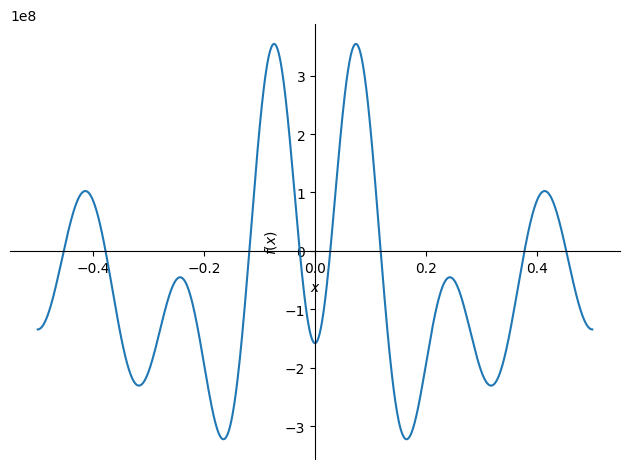

In [57]:
plot(sigmatt, (x, -0.5, 0.5))